## Exercise 2: Simple JPEG Encoder

The Discrete Cosine Transform is the key to JPEG compression. Blocks of $8 \times 8$ pixels are transformed to the frequency domain to be in a format which is more suited for compression. The code template provides you with the pixel values of a given $8 \times 8$ block.

<b>a)</b> In a greyscale image, the pixel values are usually encoded with 8 bit with values in $[0, 255]$. The DCT, however, works on $[-128, 127]$. Write a function that normalises the pixel values.

<b>b)</b> The DCT transforms an $8 \times 8$ block from the spatial domain to the frequency domain. Use

$$\begin{equation}F_{uv} = \frac{1}{\sqrt{2N}} c_u c_v \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} f_{xy} \cos \left(\frac{(2x+1)u\pi}{2N}\right) \cos \left(\frac{(2y+1)v\pi}{2N}\right)
\end{equation}$$

where 

$$\begin{equation}
c_{u;v} = \begin{cases} \frac{1}{\sqrt{2}} & u;v = 0 \\ 1 & \text{otherwise.}\end{cases}
\end{equation}$$
What is the complexity of your DCT routine? What is the meaning of $F_{00}$? 

<b>c)</b> The coefficients $F_{uv}$ are divided by quantisation values $Q_{uv}$ and rounded to the nearest integer. Quantisation is a lossy process; high quantisation coefficients result in a high compression factor, though at the expense of image quality. Implement the quantisation step. A common choice for the quantisation matrix is given in the code template. As mentioned in the lecture, a full JPEG encoder would now apply further compression techniques.  

<b>d)</b> Derive the IDCT and write a decoder for our simple JPEG block encoder. Compare the original image with the subsequently encoded and then decoded image.


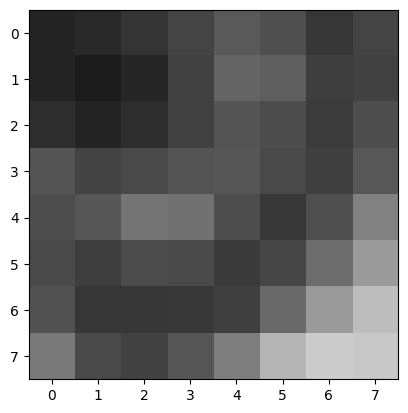

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# quantisation matrix
qtable = np.matrix( [[ 16,  11,  10,  16,  24,  40,  51,  61],
                     [ 12,  12,  14,  19,  26,  58,  60,  55],
                     [ 14,  13,  16,  24,  40,  57,  69,  56],
                     [ 14,  17,  22,  29,  51,  87,  80,  62],
                     [ 18,  22,  37,  56,  68, 109, 103,  77],
                     [ 24,  35,  55,  64,  81, 104, 113,  92],
                     [ 49,  64,  78,  87, 103, 121, 120, 101],
                     [ 72,  92,  95,  98, 112, 100, 103,  99]])

# original 8x8 block
image = np.matrix([[37, 41, 53, 68,  89, 79, 54, 68],
                 [  36, 28, 38, 65, 100, 94, 62, 65],
                 [  46, 36, 46, 66,  84, 76, 59, 78],
                 [  84, 67, 73, 84,  86, 73, 64, 87],
                 [  77, 86,116,113,  77, 57, 79, 129],
                 [  73, 62, 76, 74,  58, 70,109, 155],
                 [  82, 54, 55, 57,  63,105,154, 189],
                 [ 121, 73, 65, 86, 126,181,203, 200]], dtype=int)


plt.imshow(image, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
plt.show()


In [2]:
def normalize(image):
    return image - 128*np.ones_like(image, dtype=np.uint8)

image = normalize(image)
image


matrix([[ -91,  -87,  -75,  -60,  -39,  -49,  -74,  -60],
        [ -92, -100,  -90,  -63,  -28,  -34,  -66,  -63],
        [ -82,  -92,  -82,  -62,  -44,  -52,  -69,  -50],
        [ -44,  -61,  -55,  -44,  -42,  -55,  -64,  -41],
        [ -51,  -42,  -12,  -15,  -51,  -71,  -49,    1],
        [ -55,  -66,  -52,  -54,  -70,  -58,  -19,   27],
        [ -46,  -74,  -73,  -71,  -65,  -23,   26,   61],
        [  -7,  -55,  -63,  -42,   -2,   53,   75,   72]])

In [3]:
cosines = np.zeros((8,8))
coeffs = np.ones((8,8))

def dct(block):
    
    dct_block = np.zeros_like(block)
    
    for u in range(8):
        for v in range(8):
            block_sum = 0
            for x in range(8):
                for y in range(8):
                    pixel = block[x, y]
                    block_sum = block_sum + pixel*cosines[x, u]*cosines[y, v]
            dct_block[u, v] = int(0.25*coeffs[u, v]*block_sum)
    
    return dct_block
            
for x in range(0,8):
    for y in range(0,8):
        cosines[x,y] = np.cos((2.*x+1)*y*np.pi/16)
        
vec = np.array([1/np.sqrt(2), 1, 1, 1, 1, 1, 1, 1])
coeffs = np.outer(vec, vec)

image = dct(image)
image

matrix([[-360, -144,   35,   -5,   41,    0,   19,    0],
        [-160,   80, -110,   13,    8,  -28,    0,    0],
        [  36,  -84,   11,   63,  -14,    0,    0,    0],
        [ -30,   24,    9,  -59,    0,    0,    0,    0],
        [  60,   30,  -15,    0,    0,    0,    0,    0],
        [ -32,    0,   23,    0,    0,    0,    0,    0],
        [   0,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0,    0,  -24,    0,    0,    0,    0]])

In [4]:
def quantize(block):
    return np.round(block/qtable, 0)

image = quantize(image)
image

matrix([[-22., -13.,   4.,  -0.,   2.,   0.,   0.,   0.],
        [-13.,   7.,  -8.,   1.,   0.,  -0.,   0.,   0.],
        [  3.,  -6.,   1.,   3.,  -0.,   0.,   0.,   0.],
        [ -2.,   1.,   0.,  -2.,   0.,   0.,   0.,   0.],
        [  3.,   1.,  -0.,   0.,   0.,   0.,   0.,   0.],
        [ -1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,  -0.,   0.,   0.,   0.,   0.]])

In [5]:
def dequantize(block):
    return np.multiply(block, qtable)

image = dequantize(image)
image

matrix([[-352., -143.,   40.,   -0.,   48.,    0.,    0.,    0.],
        [-156.,   84., -112.,   19.,    0.,   -0.,    0.,    0.],
        [  42.,  -78.,   16.,   72.,   -0.,    0.,    0.,    0.],
        [ -28.,   17.,    0.,  -58.,    0.,    0.,    0.,    0.],
        [  54.,   22.,   -0.,    0.,    0.,    0.,    0.,    0.],
        [ -24.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,   -0.,    0.,    0.,    0.,    0.]])

In [7]:
def idct(block):
    
    image = np.zeros((8,8), dtype=np.uint8)
    
    for x in range(8):
        for y in range (8):
            blockSum = 0
            for u in range(8):
                for v in range(8):
                    blockSum = blockSum + coeffs[u,v] * block[u,v] * cosines[x,u] * cosines[y,v]
            
            image[x,y] = int(0.25 * blockSum)
            
    return image

image = idct(image)
image


array([[-80., -90., -81., -50., -34., -45., -61., -66.],
       [-81., -96., -90., -57., -34., -41., -58., -65.],
       [-73., -88., -84., -57., -41., -49., -60., -62.],
       [-54., -56., -48., -38., -46., -62., -57., -38.],
       [-50., -39., -25., -26., -53., -69., -41.,   2.],
       [-65., -59., -49., -48., -63., -63., -20.,  31.],
       [-46., -68., -78., -64., -43., -18.,  20.,  57.],
       [  2., -45., -76., -51.,   0.,  41.,  69.,  86.]])

In [8]:
def denormalize(block):
    return block + np.ones_like(block)*128

image = denormalize(image)
image

array([[ 48.,  38.,  47.,  78.,  94.,  83.,  67.,  62.],
       [ 47.,  32.,  38.,  71.,  94.,  87.,  70.,  63.],
       [ 55.,  40.,  44.,  71.,  87.,  79.,  68.,  66.],
       [ 74.,  72.,  80.,  90.,  82.,  66.,  71.,  90.],
       [ 78.,  89., 103., 102.,  75.,  59.,  87., 130.],
       [ 63.,  69.,  79.,  80.,  65.,  65., 108., 159.],
       [ 82.,  60.,  50.,  64.,  85., 110., 148., 185.],
       [130.,  83.,  52.,  77., 128., 169., 197., 214.]])

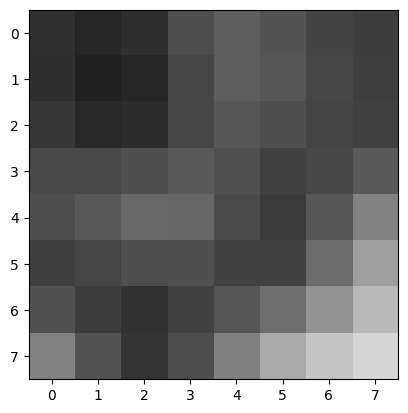

In [9]:
plt.imshow(image, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
plt.show()